# Import Packages

In [1]:
import os
import xlsxwriter
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.plotly as py
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
from scipy import stats
import warnings
os.listdir()

['.ipynb_checkpoints',
 'basisdata waterverbruik.xlsx',
 'Linear Regression Model.ipynb',
 'Paper',
 'Preliminary Analysis.ipynb',
 'README.txt',
 'requirements.txt',
 'Scikit Model Comparison.ipynb',
 'Thesis.rar']

# Parse dataframe and cleaning up weekend/year fraction variables

In [2]:
warnings.filterwarnings("ignore")
path = ("basisdata waterverbruik.xlsx")

xl = pd.ExcelFile(path)

df = xl.parse("reinwater SAP")

#year starts at day 1
daycount = 1;
#max day variable
year = 365

province = df['provnaam'].iloc[0]
for index, row in df.iterrows():
    #check if its a leap year, then set max day to 366
    if(row['jaar'] % 4 == 0):
        year = 366
    else:
        year = 365
    #reset days if the data switches to the next province
    if(daycount > year):
        daycount = 1
    if(province != row['provnaam']):
        daycount = 1
    
    df.set_value(index,'jaarfractie',daycount/year)
    #only weekends should be set to 1
    if(row['dag'] != 1 and row['dag'] != 7):
        df.set_value(index,'weekend',0)
        df.set_value(index,'doordeweek',1)
    
    province = row['provnaam']
    daycount = daycount + 1
    
     #assign correct summer vacation indicators and dummy encode provinces
    if row['provnaam'] == 'Flevoland' or row['provnaam'] == 'Friesland' or row['provnaam'] == 'Overijssel':
        df.set_value(index,'summer-vac',row['zomer-vakantie noord.1'])
    if row['provnaam'] == 'Utrecht':
        df.set_value(index,'summer-vac',row['zomer-vakantie midden.1'])
    else:
        df.set_value(index,'summer-vac',row['zomer-vakantie zuid.1'])

# Water Consumption vs Population

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


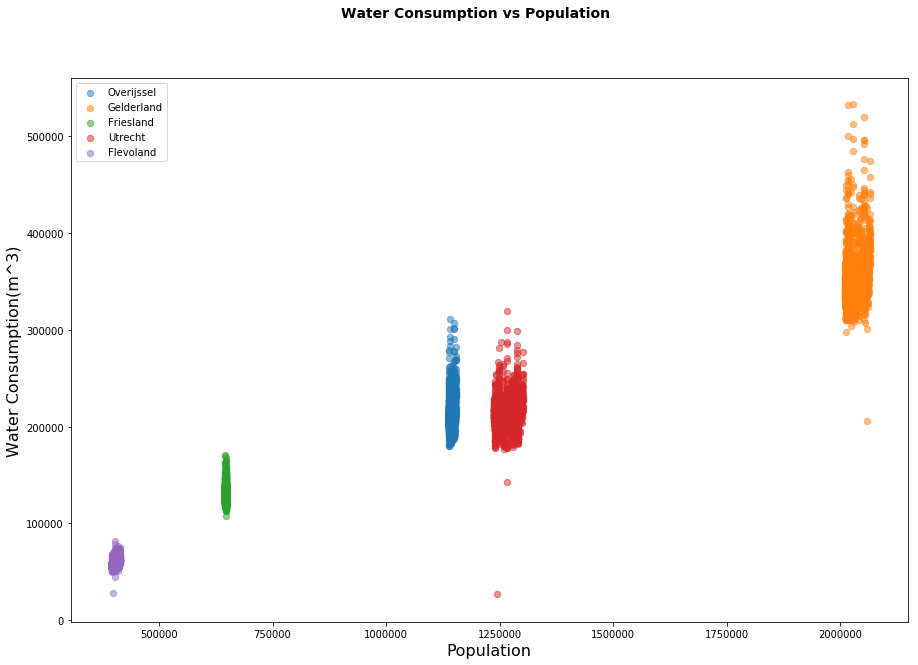

In [3]:

fig=plt.figure(figsize=(15, 10))

provinces = pd.unique(df["provnaam"])

fig.suptitle('Water Consumption vs Population', fontsize=14, fontweight='bold')
plt.xlabel('Population',fontsize=16)
plt.ylabel('Water Consumption(m^3)',fontsize=16)
for province in provinces:
    print(type(df['provnaam']))
    consumption_data = df.loc[df['provnaam'] == province]
    plt.scatter(consumption_data['bevolking'],consumption_data["tot verbruik"],s=40,label=province,alpha=0.5)
    
plt.legend(loc=2)
plt.show()

# GDP vs Water Consumption plot

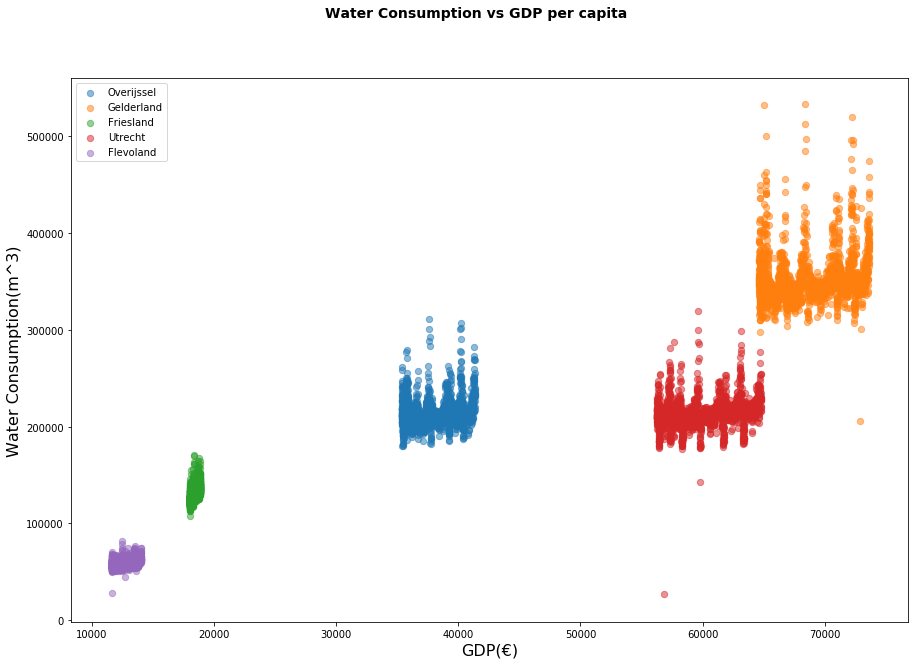

In [4]:

fig=plt.figure(figsize=(15, 10))

provinces = pd.unique(df["provnaam"])
fig.suptitle('Water Consumption vs GDP per capita', fontsize=14, fontweight='bold')
plt.xlabel('GDP(€)',fontsize=16)
plt.ylabel('Water Consumption(m^3)',fontsize=16)
for province in provinces:
    consumption_data = df.loc[df['provnaam'] == province]
    plt.scatter(consumption_data['BBP'],consumption_data["tot verbruik"],s=40,label=province,alpha=0.5)
    
plt.legend(loc=2)
plt.show()

# Temperature vs Water Consumption

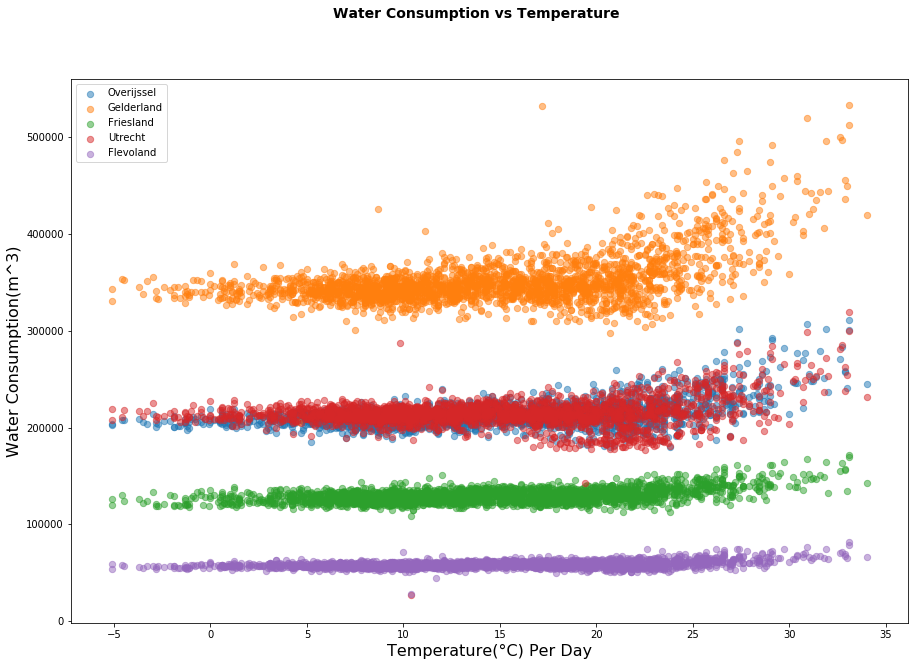

In [5]:

fig=plt.figure(figsize=(15, 10))


provinces = pd.unique(df["provnaam"])
provinces = pd.unique(df["provnaam"])
fig.suptitle('Water Consumption vs Temperature', fontsize=14, fontweight='bold')
plt.xlabel('Temperature(°C) Per Day',fontsize=16)
plt.ylabel('Water Consumption(m^3)',fontsize=16)

for province in provinces:
    consumption_data = df.loc[df['provnaam'] == province]
    plt.scatter(consumption_data['temp De Bilt'],consumption_data["tot verbruik"],s=40,label=province,alpha=0.5)
    
plt.legend(loc=2)
plt.show()

# Day vs Water Consumption

   dag  tot verbruik
0    1        336694
1    2        348268
2    3        344650
3    4        349635
4    5        344218
5    6        344998
6    7        352553
   dag   tot verbruik
0    1  340390.451039
1    2  355086.400593
2    3  349519.035608
3    4  355879.154303
4    5  350348.213650
5    6  350999.421365
6    7  357864.321429


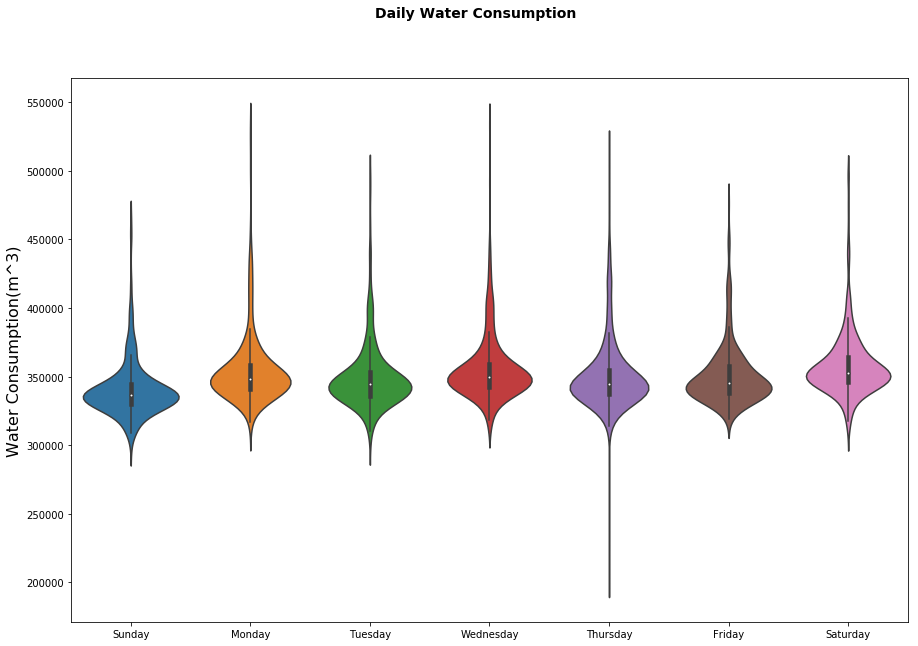

In [6]:

fig=plt.figure(figsize=(15, 10))

consumption_data =df.loc[df['provnaam'] == 'Gelderland']


total_data = []
fig.suptitle('Daily Water Consumption', fontsize=14, fontweight='bold')

grouped = consumption_data.groupby('dag', as_index=False)['tot verbruik']
print(grouped.median())
print(grouped.mean())


ax = sns.violinplot(x = consumption_data['dag'],y=consumption_data['tot verbruik'])
ax.set_xticklabels(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
ax.set_ylabel('Water Consumption(m^3)',fontsize=16)
ax.set_xlabel("")
plt.show()

# Distribution of Water Consumption

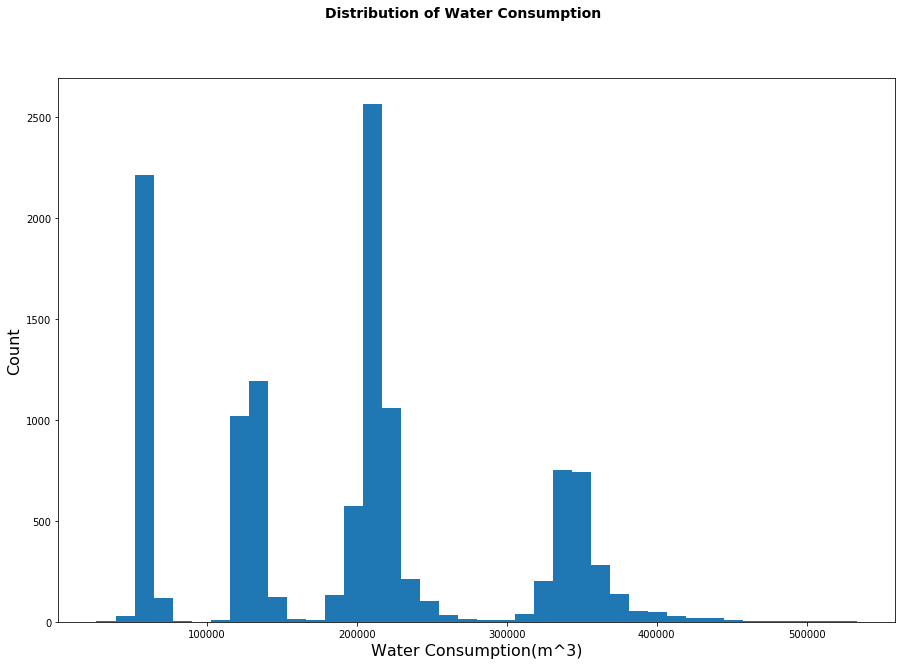

In [7]:

fig=plt.figure(figsize=(15, 10))
fig.suptitle('Distribution of Water Consumption', fontsize=14, fontweight='bold')
plt.xlabel('Water Consumption(m^3)',fontsize=16)
plt.ylabel('Count',fontsize=16)
plt.hist(df['tot verbruik'],bins = 40)
plt.show()

# Summer Vacation vs Water Consumption

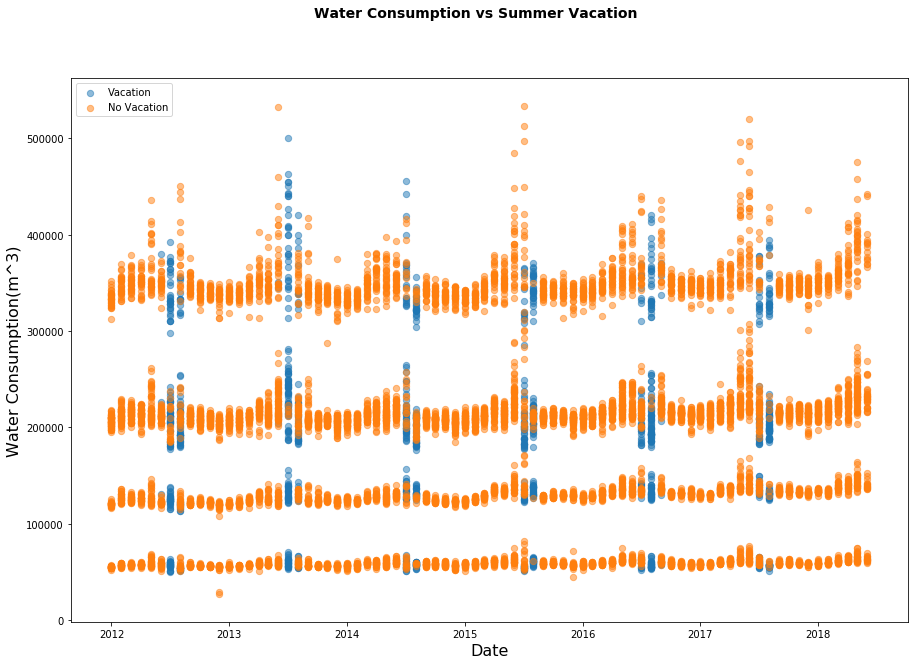

In [8]:

fig=plt.figure(figsize=(15, 10))

fig.suptitle('Water Consumption vs Summer Vacation', fontsize=14, fontweight='bold')
plt.xlabel('Date',fontsize=16)
plt.ylabel('Water Consumption(m^3)',fontsize=16)

#combine summer vacation into one variable
df['total-vacation'] = df['zomer-vakantie midden.1'] + (df['zomer-vakantie noord.1']) + df['zomer-vakantie zuid.1']

consumption_data = df.loc[df['summer-vac'] > 0]
plt.scatter(consumption_data['jaar plus fractie'],consumption_data["tot verbruik"],s=40,label='Vacation',alpha=0.5)

consumption_data = df.loc[df['summer-vac'] < 1]
plt.scatter(consumption_data['jaar plus fractie'],consumption_data["tot verbruik"],s=40,label='No Vacation',alpha=0.5)
    
plt.legend(loc=2)
plt.show()

   summer-vac  tot verbruik
0         0.0        361814
1         1.0        340379
   summer-vac   tot verbruik
0         0.0  374056.397022
1         1.0  350280.540230


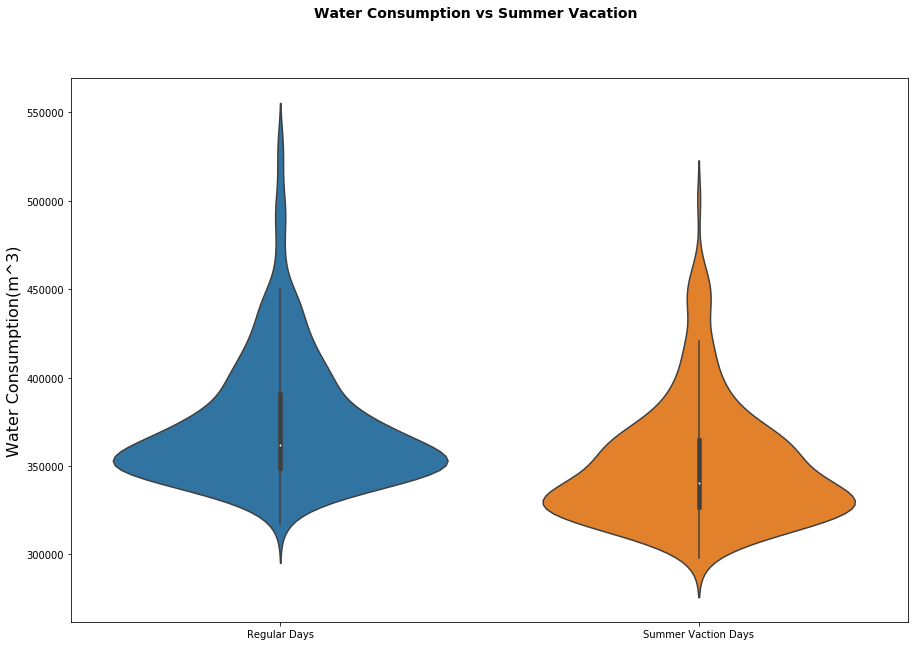

In [9]:


fig=plt.figure(figsize=(15, 10))

fig.suptitle('Water Consumption vs Summer Vacation', fontsize=14, fontweight='bold')

consumption_data =df.loc[df['provnaam'] == 'Gelderland']
x = consumption_data[consumption_data['jaarfractie'].between(.38, .67)]

grouped = x.groupby('summer-vac', as_index=False)['tot verbruik']
print(grouped.median())
print(grouped.mean())

ax = sns.violinplot(x = x['summer-vac'],y=x['tot verbruik'])
ax.set_xticklabels(['Regular Days','Summer Vaction Days'])
ax.set_ylabel('Water Consumption(m^3)',fontsize=16)
ax.set_xlabel("")
plt.show()

# Water Evaporation vs Water Consumption

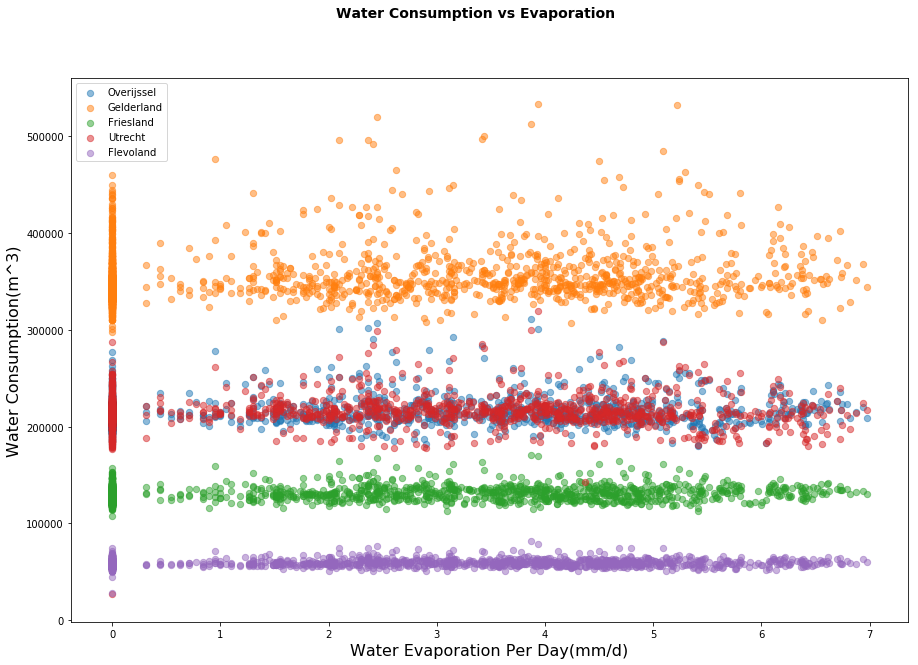

In [10]:

fig=plt.figure(figsize=(15, 10))

provinces = pd.unique(df["provnaam"])

fig.suptitle('Water Consumption vs Evaporation', fontsize=14, fontweight='bold')
plt.xlabel('Water Evaporation Per Day(mm/d)',fontsize=16)
plt.ylabel('Water Consumption(m^3)',fontsize=16)

for province in provinces:
    consumption_data = df.loc[df['provnaam'] == province]
    plt.scatter(consumption_data['verd De Bilt'],consumption_data["tot verbruik"],s=40,label=province,alpha=0.5)
    
plt.legend(loc=2)
plt.show()

# Water Evap vs Daily Temp

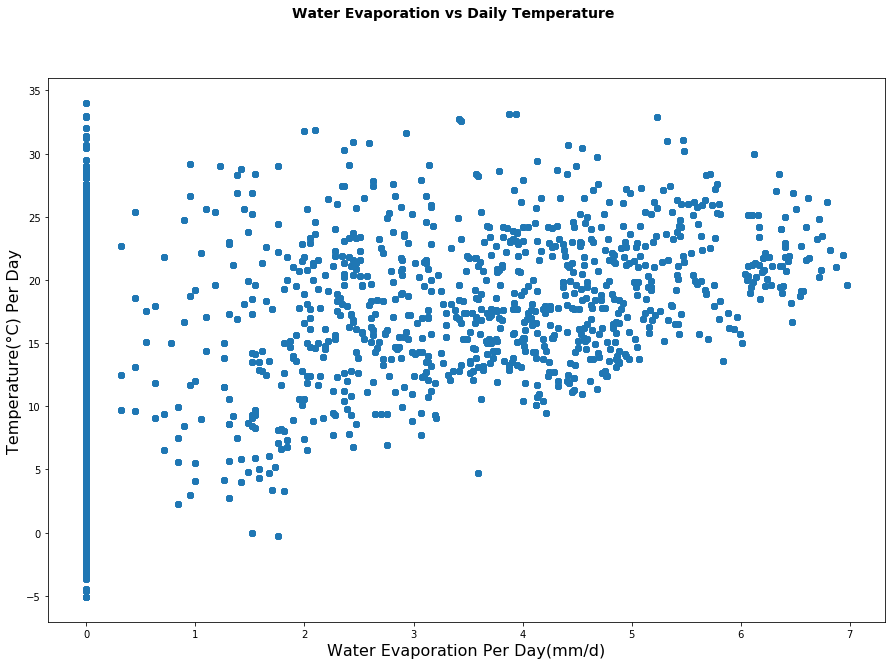

In [11]:
fig=plt.figure(figsize=(15, 10))

provinces = pd.unique(df["provnaam"])

fig.suptitle('Water Evaporation vs Daily Temperature', fontsize=14, fontweight='bold')
plt.xlabel('Water Evaporation Per Day(mm/d)',fontsize=16)
plt.ylabel('Temperature(°C) Per Day',fontsize=16)

plt.scatter(df['verd De Bilt'],df["temp De Bilt"])
    
plt.show()

# Water Consumption vs Time

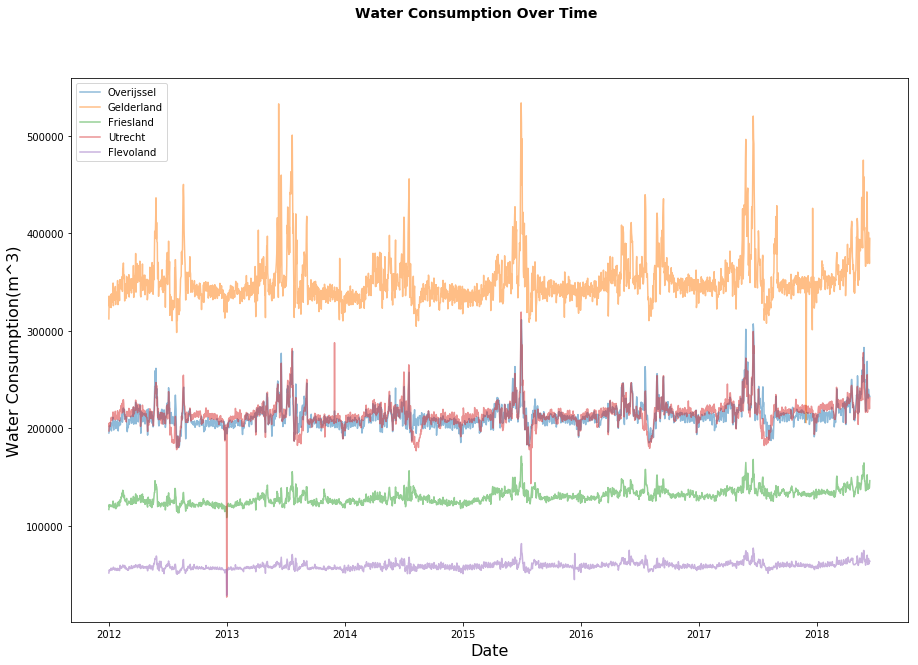

In [12]:
fig=plt.figure(figsize=(15, 10))

provinces = pd.unique(df["provnaam"])

fig.suptitle('Water Consumption Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date',fontsize=16)
plt.ylabel('Water Consumption(m^3)',fontsize=16)
for province in provinces:
    consumption_data = df.loc[df['provnaam'] == province]
    plt.plot(consumption_data['datum'],consumption_data["tot verbruik"],label=province,alpha=0.5)
    
plt.legend(loc=2)
plt.show()

1.3000000000000003


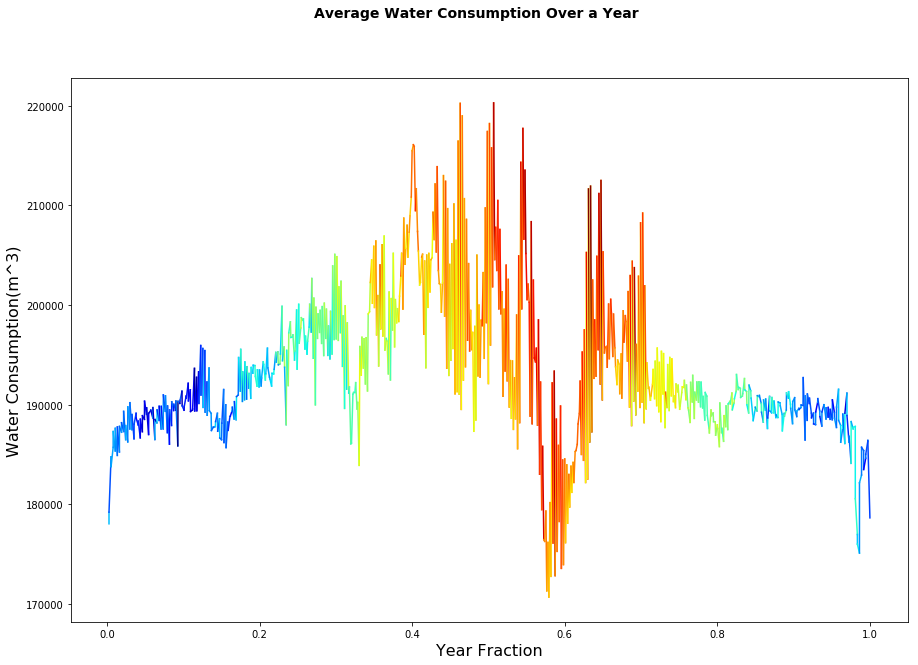

In [13]:

def plot_colorline(x,y,c):
    c = cm.jet((c-np.min(c))/(np.max(c)-np.min(c)))
    for i in np.arange(len(x)-1):
        plt.plot([x[i],x[i+1]], [y[i],y[i+1]], c=c[i])
    return 

fig=plt.figure(figsize=(15, 10))
means2 = df.groupby('jaarfractie', as_index=False)['temp De Bilt'].mean()
means = df.groupby('jaarfractie', as_index=False)['tot verbruik'].mean()
fig.suptitle('Average Water Consumption Over a Year', fontsize=14, fontweight='bold')
plt.xlabel('Year Fraction',fontsize=16)
plt.ylabel('Water Consumption(m^3)',fontsize=16)

plot_colorline(means['jaarfractie'],means["tot verbruik"],means2['temp De Bilt'])

vals = min(means2['temp De Bilt'])

print(vals)


plt.show()

# Water Consumption vs Weekend

   weekend  tot verbruik
0        0        346642
1        1        345288
   weekend   tot verbruik
0        0  352366.445104
1        1  349114.404160


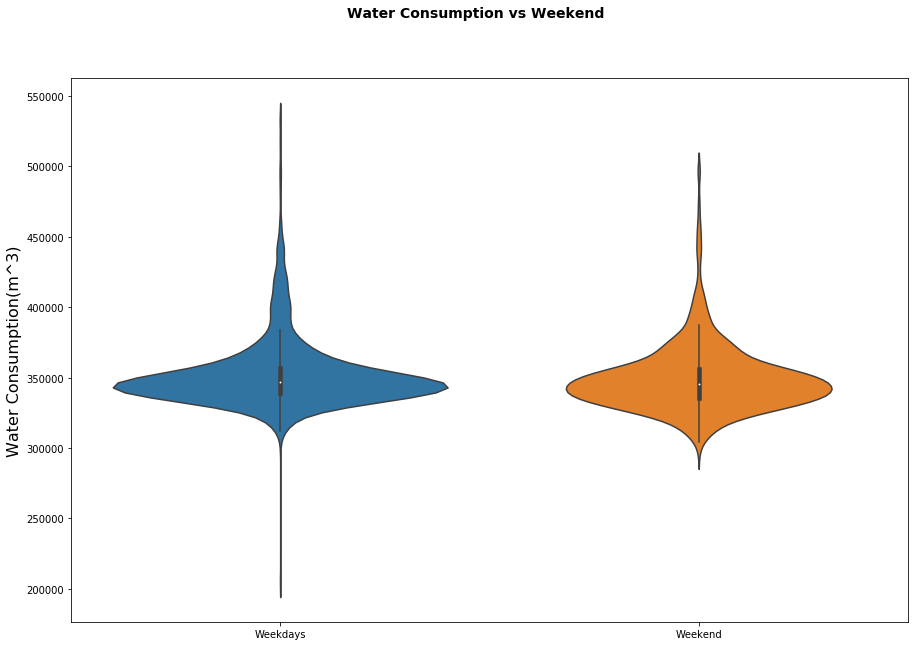

In [14]:

fig=plt.figure(figsize=(15, 10))

fig.suptitle('Water Consumption vs Weekend', fontsize=14, fontweight='bold')

consumption_data =df.loc[df['provnaam'] == 'Gelderland']

grouped = consumption_data.groupby('weekend', as_index=False)['tot verbruik']
print(grouped.median())
print(grouped.mean())

ax = sns.violinplot(x = consumption_data['weekend'],y=consumption_data['tot verbruik'])
ax.set_xticklabels(['Weekdays','Weekend'])
ax.set_ylabel('Water Consumption(m^3)',fontsize=16)
ax.set_xlabel("")
plt.show()

# Correlation of variables vs Water Consumption

In [15]:
x = df.corr()

x['tot verbruik']

jaar plus fractie          0.033661
jaar                       0.035080
dag                        0.012536
jaarfractie               -0.011223
provincie                 -0.636517
v                          1.000000
tot verbruik               1.000000
AMR                        0.530501
Huish                      0.997837
weekdag1                  -0.015681
weekdag2                   0.001624
weekdag3                  -0.001748
weekdag4                   0.008068
weekdag5                  -0.000477
weekdag6                  -0.001910
weekdag7                   0.010137
weekend                   -0.004306
doordeweek                 0.004306
bevolking                  0.983075
BBP                        0.911127
zomer-vakantie midden     -0.003573
zomer-vakantie noord      -0.030239
zomer-vakantie zuid       -0.020044
overige noord             -0.016606
overige midden            -0.017055
overige zuid              -0.015520
temp De Bilt               0.053017
tem>20                     0

# Water Consumption vs Hot Temps

Text(0, 0.5, '')

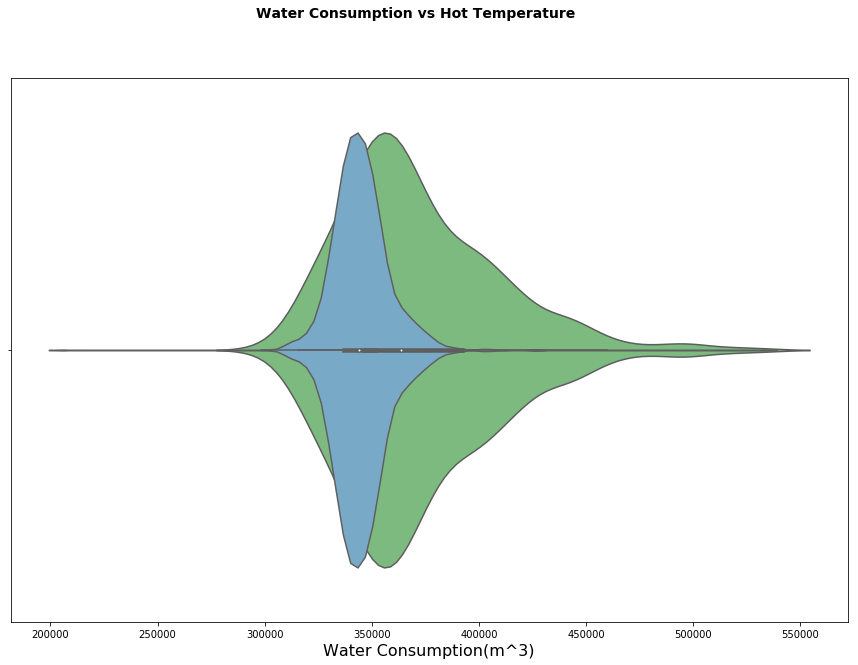

In [16]:


x = df.loc[df['provnaam'] == 'Gelderland']

fig=plt.figure(figsize=(15, 10))

fig.suptitle('Water Consumption vs Hot Temperature', fontsize=14, fontweight='bold')

total = []

not_hot = x.loc[x['tem>20'] == 0]['tot verbruik']

hot = x.loc[x['tem>20'] > 0]['tot verbruik']

ax = sns.violinplot(hot,palette="Greens")
ax = sns.violinplot(not_hot,palette="Blues")
ax.set_xlabel('Water Consumption(m^3)',fontsize=16)
ax.set_ylabel("")

# Comparison of means

In [17]:
lower_temps = df.loc[df['tem>20'] == 0]['tot verbruik']
higher_temps = df.loc[df['tem>20'] > 0]['tot verbruik']
print(stats.ttest_ind(lower_temps, higher_temps, equal_var = False))

weekdays = df.loc[df['weekend'] == 0]['tot verbruik']
weekend = df.loc[df['weekend'] > 0]['tot verbruik']
print(stats.ttest_ind(weekdays, weekend, equal_var = False))

x = df[df['jaarfractie'].between(.38, .67)]

not_summer = x.loc[df['summer-vac'] == 0]['tot verbruik']
summer = x.loc[df['summer-vac'] > 0]['tot verbruik']
print(stats.ttest_ind(summer, not_summer, equal_var = False))


Ttest_indResult(statistic=-4.947011496782059, pvalue=7.804960512101666e-07)
Ttest_indResult(statistic=0.4702525505864872, pvalue=0.6381909510913097)
Ttest_indResult(statistic=-3.286092277370169, pvalue=0.0010278586991601185)
